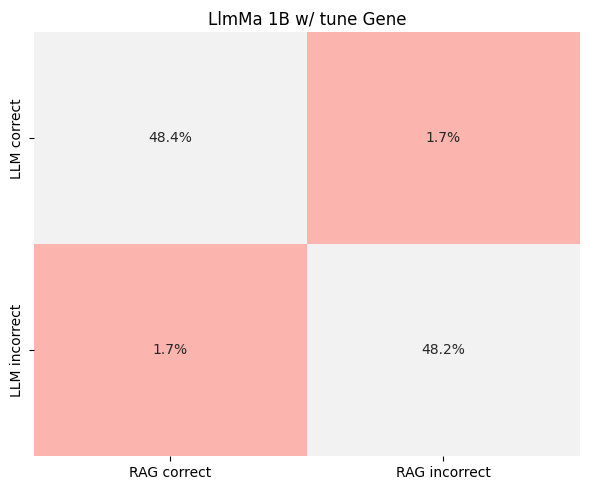

In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

def load_jsonl(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

def clean_answer(answer):
    answer = answer.strip().lower()
    if 'yes' in answer:
        return 'YES'
    elif 'no' in answer:
        return 'NO'
    return 'UNKNOWN'

def get_ground_truth(csv_path):
    df = pd.read_csv(csv_path)
    return ['YES' if str(x).strip().lower() == 'positive' else 'NO' for x in df['relation']]

def get_predictions(jsonl_data):
    return [clean_answer(entry.get('answer', '')) for entry in jsonl_data]

# Load data
csv_path = './test_data.csv'
raw_path = '/playpen/jesse/drug_repurpose/split_data/results/llama32_1b_rawcot/raw.jsonl'
gene_path = '/playpen/jesse/drug_repurpose/split_data/results/llama32_1b_rawcot/gene.jsonl'

ground_truth = get_ground_truth(csv_path)
raw_preds = get_predictions(load_jsonl(raw_path))
gene_preds = get_predictions(load_jsonl(gene_path))

# Build confusion matrix by comparing correctness
matrix = {
    "LLM correct / RAG correct": 0,
    "LLM correct / RAG incorrect": 0,
    "LLM incorrect / RAG correct": 0,
    "LLM incorrect / RAG incorrect": 0,
}

total = len(ground_truth)

for gt, raw, gene in zip(ground_truth, raw_preds, gene_preds):
    raw_correct = (raw == gt)
    gene_correct = (gene == gt)

    if gene_correct and raw_correct:
        matrix["LLM correct / RAG correct"] += 1
    elif gene_correct and not raw_correct:
        matrix["LLM correct / RAG incorrect"] += 1
    elif not gene_correct and raw_correct:
        matrix["LLM incorrect / RAG correct"] += 1
    else:
        matrix["LLM incorrect / RAG incorrect"] += 1

# Normalize to percentages
for key in matrix:
    matrix[key] = round((matrix[key] / total) * 100, 1)

# Build matrix for plotting
data = [
    [matrix["LLM correct / RAG correct"], matrix["LLM correct / RAG incorrect"]],
    [matrix["LLM incorrect / RAG correct"], matrix["LLM incorrect / RAG incorrect"]]
]

labels = [[f"{v}%" for v in row] for row in data]

plt.figure(figsize=(6, 5))
sns.heatmap(data, annot=labels, fmt='', cmap='Pastel1', cbar=False,
            xticklabels=["RAG correct", "RAG incorrect"],
            yticklabels=["LLM correct", "LLM incorrect"])
plt.title("LlmMa 1B w/ tune Gene")
plt.tight_layout()
plt.show()


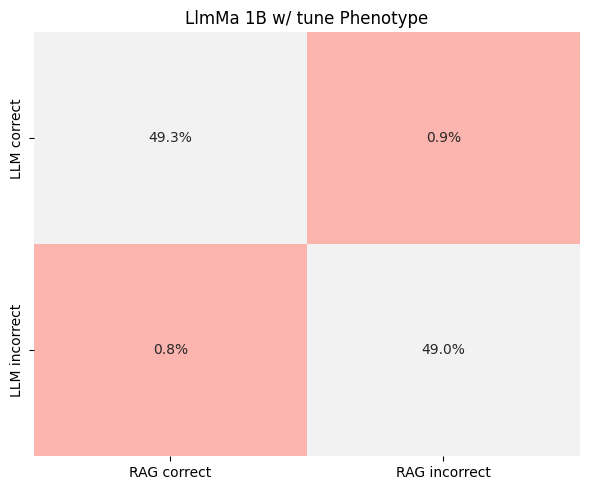

In [5]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

def load_jsonl(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

def clean_answer(answer):
    answer = answer.strip().lower()
    if 'yes' in answer:
        return 'YES'
    elif 'no' in answer:
        return 'NO'
    return 'UNKNOWN'

def get_ground_truth(csv_path):
    df = pd.read_csv(csv_path)
    return ['YES' if str(x).strip().lower() == 'positive' else 'NO' for x in df['relation']]

def get_predictions(jsonl_data):
    return [clean_answer(entry.get('answer', '')) for entry in jsonl_data]

# Load data
csv_path = './test_data.csv'
raw_path = '/playpen/jesse/drug_repurpose/split_data/results/llama32_1b_rawcot/raw.jsonl'
gene_path = '/playpen/jesse/drug_repurpose/split_data/results/llama32_1b_rawcot/phenotype.jsonl'

ground_truth = get_ground_truth(csv_path)
raw_preds = get_predictions(load_jsonl(raw_path))
gene_preds = get_predictions(load_jsonl(gene_path))

# Build confusion matrix by comparing correctness
matrix = {
    "LLM correct / RAG correct": 0,
    "LLM correct / RAG incorrect": 0,
    "LLM incorrect / RAG correct": 0,
    "LLM incorrect / RAG incorrect": 0,
}

total = len(ground_truth)

for gt, raw, gene in zip(ground_truth, raw_preds, gene_preds):
    raw_correct = (raw == gt)
    gene_correct = (gene == gt)

    if gene_correct and raw_correct:
        matrix["LLM correct / RAG correct"] += 1
    elif gene_correct and not raw_correct:
        matrix["LLM correct / RAG incorrect"] += 1
    elif not gene_correct and raw_correct:
        matrix["LLM incorrect / RAG correct"] += 1
    else:
        matrix["LLM incorrect / RAG incorrect"] += 1

# Normalize to percentages
for key in matrix:
    matrix[key] = round((matrix[key] / total) * 100, 1)

# Build matrix for plotting
data = [
    [matrix["LLM correct / RAG correct"], matrix["LLM correct / RAG incorrect"]],
    [matrix["LLM incorrect / RAG correct"], matrix["LLM incorrect / RAG incorrect"]]
]

labels = [[f"{v}%" for v in row] for row in data]

plt.figure(figsize=(6, 5))
sns.heatmap(data, annot=labels, fmt='', cmap='Pastel1', cbar=False,
            xticklabels=["RAG correct", "RAG incorrect"],
            yticklabels=["LLM correct", "LLM incorrect"])
plt.title("LlmMa 1B w/ tune Phenotype")
plt.tight_layout()
plt.show()


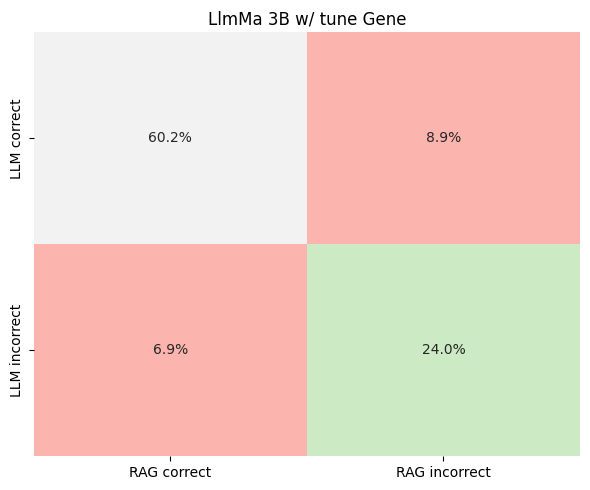

In [6]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

def load_jsonl(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

def clean_answer(answer):
    answer = answer.strip().lower()
    if 'yes' in answer:
        return 'YES'
    elif 'no' in answer:
        return 'NO'
    return 'UNKNOWN'

def get_ground_truth(csv_path):
    df = pd.read_csv(csv_path)
    return ['YES' if str(x).strip().lower() == 'positive' else 'NO' for x in df['relation']]

def get_predictions(jsonl_data):
    return [clean_answer(entry.get('answer', '')) for entry in jsonl_data]

# Load data
csv_path = './test_data.csv'
raw_path = '/playpen/jesse/drug_repurpose/split_data/results/llama32_3b_rawcot/raw.jsonl'
gene_path = '/playpen/jesse/drug_repurpose/split_data/results/llama32_3b_rawcot/gene.jsonl'

ground_truth = get_ground_truth(csv_path)
raw_preds = get_predictions(load_jsonl(raw_path))
gene_preds = get_predictions(load_jsonl(gene_path))

# Build confusion matrix by comparing correctness
matrix = {
    "LLM correct / RAG correct": 0,
    "LLM correct / RAG incorrect": 0,
    "LLM incorrect / RAG correct": 0,
    "LLM incorrect / RAG incorrect": 0,
}

total = len(ground_truth)

for gt, raw, gene in zip(ground_truth, raw_preds, gene_preds):
    raw_correct = (raw == gt)
    gene_correct = (gene == gt)

    if gene_correct and raw_correct:
        matrix["LLM correct / RAG correct"] += 1
    elif gene_correct and not raw_correct:
        matrix["LLM correct / RAG incorrect"] += 1
    elif not gene_correct and raw_correct:
        matrix["LLM incorrect / RAG correct"] += 1
    else:
        matrix["LLM incorrect / RAG incorrect"] += 1

# Normalize to percentages
for key in matrix:
    matrix[key] = round((matrix[key] / total) * 100, 1)

# Build matrix for plotting
data = [
    [matrix["LLM correct / RAG correct"], matrix["LLM correct / RAG incorrect"]],
    [matrix["LLM incorrect / RAG correct"], matrix["LLM incorrect / RAG incorrect"]]
]

labels = [[f"{v}%" for v in row] for row in data]

plt.figure(figsize=(6, 5))
sns.heatmap(data, annot=labels, fmt='', cmap='Pastel1', cbar=False,
            xticklabels=["RAG correct", "RAG incorrect"],
            yticklabels=["LLM correct", "LLM incorrect"])
plt.title("LlmMa 3B w/ tune Gene")
plt.tight_layout()
plt.show()


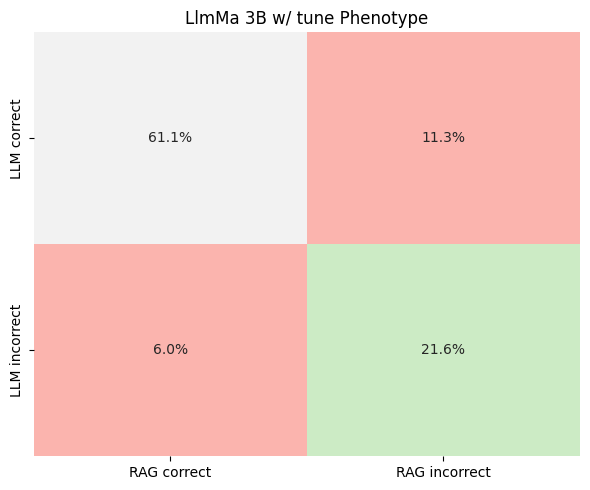

In [7]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

def load_jsonl(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

def clean_answer(answer):
    answer = answer.strip().lower()
    if 'yes' in answer:
        return 'YES'
    elif 'no' in answer:
        return 'NO'
    return 'UNKNOWN'

def get_ground_truth(csv_path):
    df = pd.read_csv(csv_path)
    return ['YES' if str(x).strip().lower() == 'positive' else 'NO' for x in df['relation']]

def get_predictions(jsonl_data):
    return [clean_answer(entry.get('answer', '')) for entry in jsonl_data]

# Load data
csv_path = './test_data.csv'
raw_path = '/playpen/jesse/drug_repurpose/split_data/results/llama32_3b_rawcot/raw.jsonl'
gene_path = '/playpen/jesse/drug_repurpose/split_data/results/llama32_3b_rawcot/phenotype.jsonl'

ground_truth = get_ground_truth(csv_path)
raw_preds = get_predictions(load_jsonl(raw_path))
gene_preds = get_predictions(load_jsonl(gene_path))

# Build confusion matrix by comparing correctness
matrix = {
    "LLM correct / RAG correct": 0,
    "LLM correct / RAG incorrect": 0,
    "LLM incorrect / RAG correct": 0,
    "LLM incorrect / RAG incorrect": 0,
}

total = len(ground_truth)

for gt, raw, gene in zip(ground_truth, raw_preds, gene_preds):
    raw_correct = (raw == gt)
    gene_correct = (gene == gt)

    if gene_correct and raw_correct:
        matrix["LLM correct / RAG correct"] += 1
    elif gene_correct and not raw_correct:
        matrix["LLM correct / RAG incorrect"] += 1
    elif not gene_correct and raw_correct:
        matrix["LLM incorrect / RAG correct"] += 1
    else:
        matrix["LLM incorrect / RAG incorrect"] += 1

# Normalize to percentages
for key in matrix:
    matrix[key] = round((matrix[key] / total) * 100, 1)

# Build matrix for plotting
data = [
    [matrix["LLM correct / RAG correct"], matrix["LLM correct / RAG incorrect"]],
    [matrix["LLM incorrect / RAG correct"], matrix["LLM incorrect / RAG incorrect"]]
]

labels = [[f"{v}%" for v in row] for row in data]

plt.figure(figsize=(6, 5))
sns.heatmap(data, annot=labels, fmt='', cmap='Pastel1', cbar=False,
            xticklabels=["RAG correct", "RAG incorrect"],
            yticklabels=["LLM correct", "LLM incorrect"])
plt.title("LlmMa 3B w/ tune Phenotype")
plt.tight_layout()
plt.show()


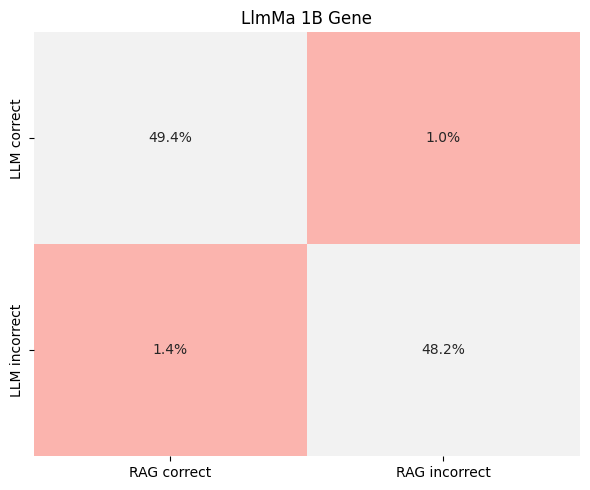

In [8]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

def load_jsonl(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

def clean_answer(answer):
    answer = answer.strip().lower()
    if 'yes' in answer:
        return 'YES'
    elif 'no' in answer:
        return 'NO'
    return 'UNKNOWN'

def get_ground_truth(csv_path):
    df = pd.read_csv(csv_path)
    return ['YES' if str(x).strip().lower() == 'positive' else 'NO' for x in df['relation']]

def get_predictions(jsonl_data):
    return [clean_answer(entry.get('answer', '')) for entry in jsonl_data]

# Load data
csv_path = './test_data.csv'
raw_path = '/playpen/jesse/drug_repurpose/split_data/results/llama32_1b/raw.jsonl'
gene_path = '/playpen/jesse/drug_repurpose/split_data/results/llama32_1b/gene.jsonl'

ground_truth = get_ground_truth(csv_path)
raw_preds = get_predictions(load_jsonl(raw_path))
gene_preds = get_predictions(load_jsonl(gene_path))

# Build confusion matrix by comparing correctness
matrix = {
    "LLM correct / RAG correct": 0,
    "LLM correct / RAG incorrect": 0,
    "LLM incorrect / RAG correct": 0,
    "LLM incorrect / RAG incorrect": 0,
}

total = len(ground_truth)

for gt, raw, gene in zip(ground_truth, raw_preds, gene_preds):
    raw_correct = (raw == gt)
    gene_correct = (gene == gt)

    if gene_correct and raw_correct:
        matrix["LLM correct / RAG correct"] += 1
    elif gene_correct and not raw_correct:
        matrix["LLM correct / RAG incorrect"] += 1
    elif not gene_correct and raw_correct:
        matrix["LLM incorrect / RAG correct"] += 1
    else:
        matrix["LLM incorrect / RAG incorrect"] += 1

# Normalize to percentages
for key in matrix:
    matrix[key] = round((matrix[key] / total) * 100, 1)

# Build matrix for plotting
data = [
    [matrix["LLM correct / RAG correct"], matrix["LLM correct / RAG incorrect"]],
    [matrix["LLM incorrect / RAG correct"], matrix["LLM incorrect / RAG incorrect"]]
]

labels = [[f"{v}%" for v in row] for row in data]

plt.figure(figsize=(6, 5))
sns.heatmap(data, annot=labels, fmt='', cmap='Pastel1', cbar=False,
            xticklabels=["RAG correct", "RAG incorrect"],
            yticklabels=["LLM correct", "LLM incorrect"])
plt.title("LlmMa 1B Gene")
plt.tight_layout()
plt.show()


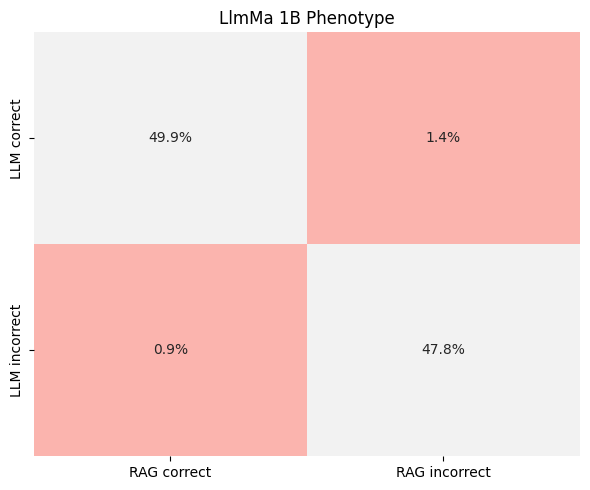

In [9]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

def load_jsonl(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

def clean_answer(answer):
    answer = answer.strip().lower()
    if 'yes' in answer:
        return 'YES'
    elif 'no' in answer:
        return 'NO'
    return 'UNKNOWN'

def get_ground_truth(csv_path):
    df = pd.read_csv(csv_path)
    return ['YES' if str(x).strip().lower() == 'positive' else 'NO' for x in df['relation']]

def get_predictions(jsonl_data):
    return [clean_answer(entry.get('answer', '')) for entry in jsonl_data]

# Load data
csv_path = './test_data.csv'
raw_path = '/playpen/jesse/drug_repurpose/split_data/results/llama32_1b/raw.jsonl'
gene_path = '/playpen/jesse/drug_repurpose/split_data/results/llama32_1b/phenotype.jsonl'

ground_truth = get_ground_truth(csv_path)
raw_preds = get_predictions(load_jsonl(raw_path))
gene_preds = get_predictions(load_jsonl(gene_path))

# Build confusion matrix by comparing correctness
matrix = {
    "LLM correct / RAG correct": 0,
    "LLM correct / RAG incorrect": 0,
    "LLM incorrect / RAG correct": 0,
    "LLM incorrect / RAG incorrect": 0,
}

total = len(ground_truth)

for gt, raw, gene in zip(ground_truth, raw_preds, gene_preds):
    raw_correct = (raw == gt)
    gene_correct = (gene == gt)

    if gene_correct and raw_correct:
        matrix["LLM correct / RAG correct"] += 1
    elif gene_correct and not raw_correct:
        matrix["LLM correct / RAG incorrect"] += 1
    elif not gene_correct and raw_correct:
        matrix["LLM incorrect / RAG correct"] += 1
    else:
        matrix["LLM incorrect / RAG incorrect"] += 1

# Normalize to percentages
for key in matrix:
    matrix[key] = round((matrix[key] / total) * 100, 1)

# Build matrix for plotting
data = [
    [matrix["LLM correct / RAG correct"], matrix["LLM correct / RAG incorrect"]],
    [matrix["LLM incorrect / RAG correct"], matrix["LLM incorrect / RAG incorrect"]]
]

labels = [[f"{v}%" for v in row] for row in data]

plt.figure(figsize=(6, 5))
sns.heatmap(data, annot=labels, fmt='', cmap='Pastel1', cbar=False,
            xticklabels=["RAG correct", "RAG incorrect"],
            yticklabels=["LLM correct", "LLM incorrect"])
plt.title("LlmMa 1B Phenotype")
plt.tight_layout()
plt.show()


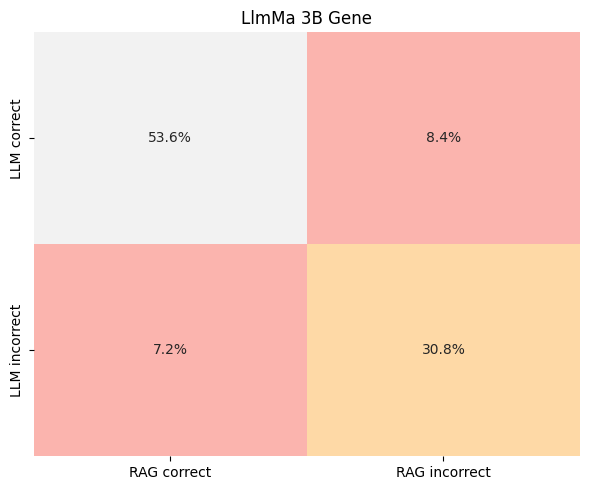

In [10]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

def load_jsonl(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

def clean_answer(answer):
    answer = answer.strip().lower()
    if 'yes' in answer:
        return 'YES'
    elif 'no' in answer:
        return 'NO'
    return 'UNKNOWN'

def get_ground_truth(csv_path):
    df = pd.read_csv(csv_path)
    return ['YES' if str(x).strip().lower() == 'positive' else 'NO' for x in df['relation']]

def get_predictions(jsonl_data):
    return [clean_answer(entry.get('answer', '')) for entry in jsonl_data]

# Load data
csv_path = './test_data.csv'
raw_path = '/playpen/jesse/drug_repurpose/split_data/results/llama32_3b/raw.jsonl'
gene_path = '/playpen/jesse/drug_repurpose/split_data/results/llama32_3b/gene.jsonl'

ground_truth = get_ground_truth(csv_path)
raw_preds = get_predictions(load_jsonl(raw_path))
gene_preds = get_predictions(load_jsonl(gene_path))

# Build confusion matrix by comparing correctness
matrix = {
    "LLM correct / RAG correct": 0,
    "LLM correct / RAG incorrect": 0,
    "LLM incorrect / RAG correct": 0,
    "LLM incorrect / RAG incorrect": 0,
}

total = len(ground_truth)

for gt, raw, gene in zip(ground_truth, raw_preds, gene_preds):
    raw_correct = (raw == gt)
    gene_correct = (gene == gt)

    if gene_correct and raw_correct:
        matrix["LLM correct / RAG correct"] += 1
    elif gene_correct and not raw_correct:
        matrix["LLM correct / RAG incorrect"] += 1
    elif not gene_correct and raw_correct:
        matrix["LLM incorrect / RAG correct"] += 1
    else:
        matrix["LLM incorrect / RAG incorrect"] += 1

# Normalize to percentages
for key in matrix:
    matrix[key] = round((matrix[key] / total) * 100, 1)

# Build matrix for plotting
data = [
    [matrix["LLM correct / RAG correct"], matrix["LLM correct / RAG incorrect"]],
    [matrix["LLM incorrect / RAG correct"], matrix["LLM incorrect / RAG incorrect"]]
]

labels = [[f"{v}%" for v in row] for row in data]

plt.figure(figsize=(6, 5))
sns.heatmap(data, annot=labels, fmt='', cmap='Pastel1', cbar=False,
            xticklabels=["RAG correct", "RAG incorrect"],
            yticklabels=["LLM correct", "LLM incorrect"])
plt.title("LlmMa 3B Gene")
plt.tight_layout()
plt.show()


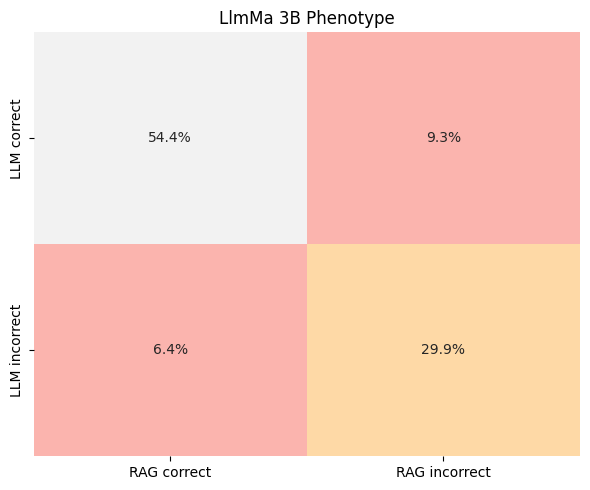

In [11]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

def load_jsonl(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

def clean_answer(answer):
    answer = answer.strip().lower()
    if 'yes' in answer:
        return 'YES'
    elif 'no' in answer:
        return 'NO'
    return 'UNKNOWN'

def get_ground_truth(csv_path):
    df = pd.read_csv(csv_path)
    return ['YES' if str(x).strip().lower() == 'positive' else 'NO' for x in df['relation']]

def get_predictions(jsonl_data):
    return [clean_answer(entry.get('answer', '')) for entry in jsonl_data]

# Load data
csv_path = './test_data.csv'
raw_path = '/playpen/jesse/drug_repurpose/split_data/results/llama32_3b/raw.jsonl'
gene_path = '/playpen/jesse/drug_repurpose/split_data/results/llama32_3b/phenotype.jsonl'

ground_truth = get_ground_truth(csv_path)
raw_preds = get_predictions(load_jsonl(raw_path))
gene_preds = get_predictions(load_jsonl(gene_path))

# Build confusion matrix by comparing correctness
matrix = {
    "LLM correct / RAG correct": 0,
    "LLM correct / RAG incorrect": 0,
    "LLM incorrect / RAG correct": 0,
    "LLM incorrect / RAG incorrect": 0,
}

total = len(ground_truth)

for gt, raw, gene in zip(ground_truth, raw_preds, gene_preds):
    raw_correct = (raw == gt)
    gene_correct = (gene == gt)

    if gene_correct and raw_correct:
        matrix["LLM correct / RAG correct"] += 1
    elif gene_correct and not raw_correct:
        matrix["LLM correct / RAG incorrect"] += 1
    elif not gene_correct and raw_correct:
        matrix["LLM incorrect / RAG correct"] += 1
    else:
        matrix["LLM incorrect / RAG incorrect"] += 1

# Normalize to percentages
for key in matrix:
    matrix[key] = round((matrix[key] / total) * 100, 1)

# Build matrix for plotting
data = [
    [matrix["LLM correct / RAG correct"], matrix["LLM correct / RAG incorrect"]],
    [matrix["LLM incorrect / RAG correct"], matrix["LLM incorrect / RAG incorrect"]]
]

labels = [[f"{v}%" for v in row] for row in data]

plt.figure(figsize=(6, 5))
sns.heatmap(data, annot=labels, fmt='', cmap='Pastel1', cbar=False,
            xticklabels=["RAG correct", "RAG incorrect"],
            yticklabels=["LLM correct", "LLM incorrect"])
plt.title("LlmMa 3B Phenotype")
plt.tight_layout()
plt.show()


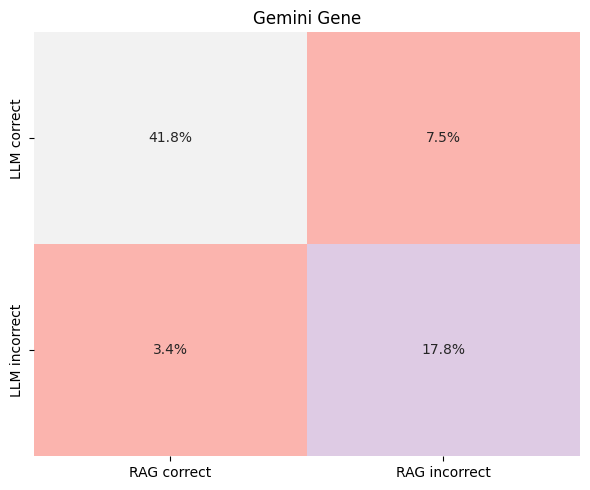

In [13]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

def load_jsonl(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

def clean_answer(answer):
    answer = answer.strip().lower()
    if 'yes' in answer:
        return 'YES'
    elif 'no' in answer:
        return 'NO'
    return 'UNKNOWN'

def get_ground_truth(csv_path):
    df = pd.read_csv(csv_path)
    return ['YES' if str(x).strip().lower() == 'positive' else 'NO' for x in df['relation']]

def get_predictions(jsonl_data):
    return [clean_answer(entry.get('answer', '')) for entry in jsonl_data]

# Load data
csv_path = './test_data.csv'
raw_path = '/playpen/jesse/drug_repurpose/split_data/results/gemini/raw.jsonl'
gene_path = '/playpen/jesse/drug_repurpose/split_data/results/gemini/gene.jsonl'

ground_truth = get_ground_truth(csv_path)
raw_preds = get_predictions(load_jsonl(raw_path))
gene_preds = get_predictions(load_jsonl(gene_path))

# Build confusion matrix by comparing correctness
matrix = {
    "LLM correct / RAG correct": 0,
    "LLM correct / RAG incorrect": 0,
    "LLM incorrect / RAG correct": 0,
    "LLM incorrect / RAG incorrect": 0,
}

total = len(ground_truth)

for gt, raw, gene in zip(ground_truth, raw_preds, gene_preds):
    raw_correct = (raw == gt)
    gene_correct = (gene == gt)

    if gene_correct and raw_correct:
        matrix["LLM correct / RAG correct"] += 1
    elif gene_correct and not raw_correct:
        matrix["LLM correct / RAG incorrect"] += 1
    elif not gene_correct and raw_correct:
        matrix["LLM incorrect / RAG correct"] += 1
    else:
        matrix["LLM incorrect / RAG incorrect"] += 1

# Normalize to percentages
for key in matrix:
    matrix[key] = round((matrix[key] / total) * 100, 1)

# Build matrix for plotting
data = [
    [matrix["LLM correct / RAG correct"], matrix["LLM correct / RAG incorrect"]],
    [matrix["LLM incorrect / RAG correct"], matrix["LLM incorrect / RAG incorrect"]]
]

labels = [[f"{v}%" for v in row] for row in data]

plt.figure(figsize=(6, 5))
sns.heatmap(data, annot=labels, fmt='', cmap='Pastel1', cbar=False,
            xticklabels=["RAG correct", "RAG incorrect"],
            yticklabels=["LLM correct", "LLM incorrect"])
plt.title("Gemini Gene")
plt.tight_layout()
plt.show()


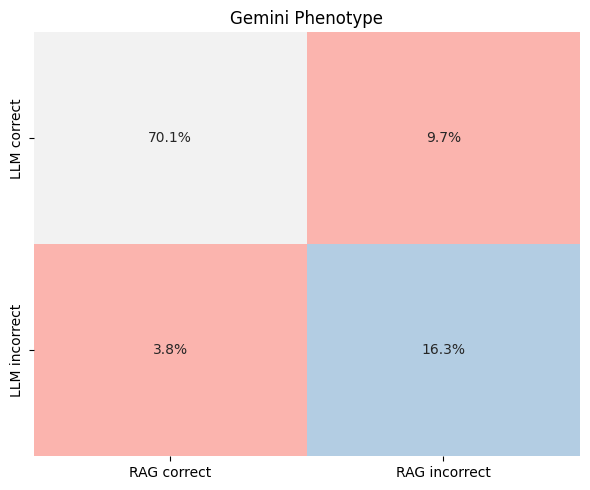

In [14]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

def load_jsonl(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

def clean_answer(answer):
    answer = answer.strip().lower()
    if 'yes' in answer:
        return 'YES'
    elif 'no' in answer:
        return 'NO'
    return 'UNKNOWN'

def get_ground_truth(csv_path):
    df = pd.read_csv(csv_path)
    return ['YES' if str(x).strip().lower() == 'positive' else 'NO' for x in df['relation']]

def get_predictions(jsonl_data):
    return [clean_answer(entry.get('answer', '')) for entry in jsonl_data]

# Load data
csv_path = './test_data.csv'
raw_path = '/playpen/jesse/drug_repurpose/split_data/results/gemini/raw.jsonl'
gene_path = '/playpen/jesse/drug_repurpose/split_data/results/gemini/phenotype.jsonl'

ground_truth = get_ground_truth(csv_path)
raw_preds = get_predictions(load_jsonl(raw_path))
gene_preds = get_predictions(load_jsonl(gene_path))

# Build confusion matrix by comparing correctness
matrix = {
    "LLM correct / RAG correct": 0,
    "LLM correct / RAG incorrect": 0,
    "LLM incorrect / RAG correct": 0,
    "LLM incorrect / RAG incorrect": 0,
}

total = len(ground_truth)

for gt, raw, gene in zip(ground_truth, raw_preds, gene_preds):
    raw_correct = (raw == gt)
    gene_correct = (gene == gt)

    if gene_correct and raw_correct:
        matrix["LLM correct / RAG correct"] += 1
    elif gene_correct and not raw_correct:
        matrix["LLM correct / RAG incorrect"] += 1
    elif not gene_correct and raw_correct:
        matrix["LLM incorrect / RAG correct"] += 1
    else:
        matrix["LLM incorrect / RAG incorrect"] += 1

# Normalize to percentages
for key in matrix:
    matrix[key] = round((matrix[key] / total) * 100, 1)

# Build matrix for plotting
data = [
    [matrix["LLM correct / RAG correct"], matrix["LLM correct / RAG incorrect"]],
    [matrix["LLM incorrect / RAG correct"], matrix["LLM incorrect / RAG incorrect"]]
]

labels = [[f"{v}%" for v in row] for row in data]

plt.figure(figsize=(6, 5))
sns.heatmap(data, annot=labels, fmt='', cmap='Pastel1', cbar=False,
            xticklabels=["RAG correct", "RAG incorrect"],
            yticklabels=["LLM correct", "LLM incorrect"])
plt.title("Gemini Phenotype")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

def load_jsonl(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

def clean_answer(answer):
    answer = answer.strip().lower()
    if 'yes' in answer:
        return 'YES'
    elif 'no' in answer:
        return 'NO'
    return 'UNKNOWN'

def get_ground_truth(csv_path):
    df = pd.read_csv(csv_path)
    return ['YES' if str(x).strip().lower() == 'positive' else 'NO' for x in df['relation']]

def get_predictions(jsonl_data):
    return [clean_answer(entry.get('answer', '')) for entry in jsonl_data]

# Load data
csv_path = './test_data.csv'
raw_path = '/playpen/jesse/drug_repurpose/split_data/results/gemini/fraw.jsonl'
gene_path = '/playpen/jesse/drug_repurpose/split_data/results/gemini/phenotype.jsonl'

ground_truth = get_ground_truth(csv_path)
raw_preds = get_predictions(load_jsonl(raw_path))
gene_preds = get_predictions(load_jsonl(gene_path))

# Build confusion matrix by comparing correctness
matrix = {
    "LLM correct / RAG correct": 0,
    "LLM correct / RAG incorrect": 0,
    "LLM incorrect / RAG correct": 0,
    "LLM incorrect / RAG incorrect": 0,
}

total = len(ground_truth)

for gt, raw, gene in zip(ground_truth, raw_preds, gene_preds):
    raw_correct = (raw == gt)
    gene_correct = (gene == gt)

    if gene_correct and raw_correct:
        matrix["LLM correct / RAG correct"] += 1
    elif gene_correct and not raw_correct:
        matrix["LLM correct / RAG incorrect"] += 1
    elif not gene_correct and raw_correct:
        matrix["LLM incorrect / RAG correct"] += 1
    else:
        matrix["LLM incorrect / RAG incorrect"] += 1

# Normalize to percentages
for key in matrix:
    matrix[key] = round((matrix[key] / total) * 100, 1)

# Build matrix for plotting
data = [
    [matrix["LLM correct / RAG correct"], matrix["LLM correct / RAG incorrect"]],
    [matrix["LLM incorrect / RAG correct"], matrix["LLM incorrect / RAG incorrect"]]
]

labels = [[f"{v}%" for v in row] for row in data]

plt.figure(figsize=(6, 5))
sns.heatmap(data, annot=labels, fmt='', cmap='Pastel1', cbar=False,
            xticklabels=["RAG correct", "RAG incorrect"],
            yticklabels=["LLM correct", "LLM incorrect"])
plt.title("Gemini Phenotype")
plt.tight_layout()
plt.show()


KeyError: 'Fraw correct / Phenotype correct'